In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Piecewise Functions

### Piecewise Constant Basises

In [2]:
def phi(x, X):
    diff = np.abs(X - x)
    idx = int(np.where(diff == diff.min())[0])
    if idx > 0 and idx < len(X) - 1 :
        y = 1
    else:
        y = 0
    return y

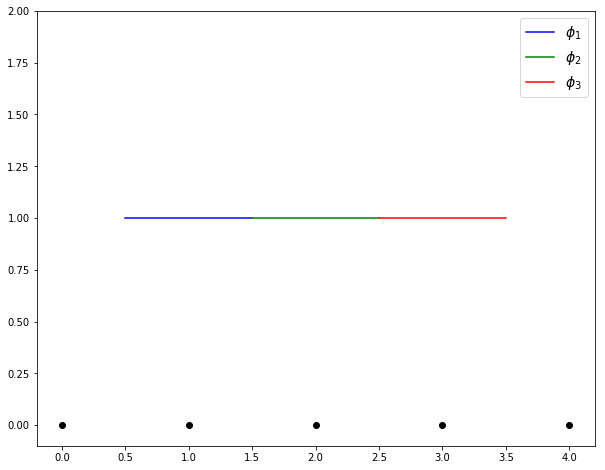

In [3]:
fixed_pts = np.linspace(0, 4, 5)
n = 1000
xn = np.linspace(0, 5, n)
yn = np.zeros(n)
for i,x in enumerate(xn):
    yn[i] = phi(x, fixed_pts)

plt.figure(figsize=(10, 8))  
colors = ['b', 'g', 'r', 'orange']
for i in range(1, len(fixed_pts)-1):
    l = (fixed_pts[i-1] + fixed_pts[i]) / 2
    r = (fixed_pts[i] + fixed_pts[i+1]) / 2
    xni = xn[(xn > l) & (xn < r)]
    yni = yn[(xn > l) & (xn < r)]
    plt.plot(xni, yni, c=colors[i-1], label="$\phi_{}$".format(i))
plt.plot(fixed_pts, np.zeros(len(fixed_pts)), 'ko')  
plt.legend(fontsize=14)
plt.ylim(-0.1, 2)
plt.show()

### Piecewise Linear Basis

In [4]:
def psi(x, X ):
    diff = np.abs(X - x)
    idx = int(np.where(diff == diff.min())[0])
    if idx > 0 and idx < len(X) - 1 :
        #print(idx)
        if x - X[idx] <= 0:
            y = (x - X[idx-1]) / (X[idx] - X[idx-1])
        else:
            y = (X[idx+1] - x) / (X[idx+1] - X[idx])
    else:
        y = 0
    return y

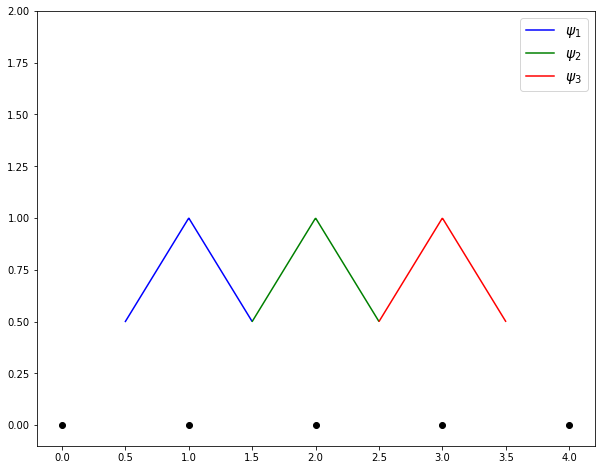

In [5]:
fixed_pts = np.linspace(0, 4, 5)
xn = np.linspace(0, 5, 1000)

yn = np.zeros(n)
for i,x in enumerate(xn):
    yn[i] = psi(x, fixed_pts)

plt.figure(figsize=(10, 8)) 
colors = ['b', 'g', 'r', 'orange']
for i in range(1, len(fixed_pts)-1):
    l = (fixed_pts[i-1] + fixed_pts[i]) / 2
    r = (fixed_pts[i] + fixed_pts[i+1]) / 2
    xni = xn[(xn > l) & (xn < r)]
    yni = yn[(xn > l) & (xn < r)]
    plt.plot(xni, yni, c=colors[i-1], label="$\psi_{}$".format(i))
plt.plot(fixed_pts, np.zeros(len(fixed_pts)), 'ko')  
plt.legend(fontsize=14)
plt.ylim(-0.1, 2)
plt.show()

## Interpolation

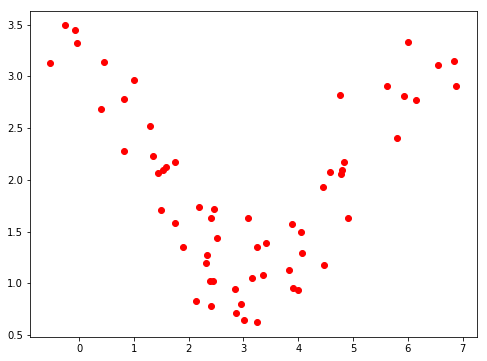

In [40]:
n = 60
np.random.seed(123)
x = np.random.uniform(-1, 7, n)
x.sort()
f = lambda x: np.cos(x) + 2
y = f(x) +  np.random.randn(n) * 0.3

plt.figure(figsize=(8, 6))
plt.plot(x, y, "ro")
plt.show()

### With Piecewise Constant Basises

In [41]:
def piecewise_constant_basis(x, fixed_pts):
    basises = []
    for i in range(1, len(fixed_pts)-1):
        cond = (x > (fixed_pts[i-1]+fixed_pts[i]) / 2) & \
                (x < (fixed_pts[i]+fixed_pts[i+1]) / 2)
        basises.append(cond.astype('int'))
    return np.array(basises).T

In [54]:
fixed_pts = [-1, 0, 2, 3, 4, 6, 7]
X_cons = piecewise_constant_basis(x, fixed_pts)

In [55]:
Beta = np.linalg.inv(X_cons.T @ X_cons) @ X_cons.T @ y
y_pred = X_cons @ Beta
error = np.sum((y - y_pred)**2) / len(y)
error

0.8512390540310595

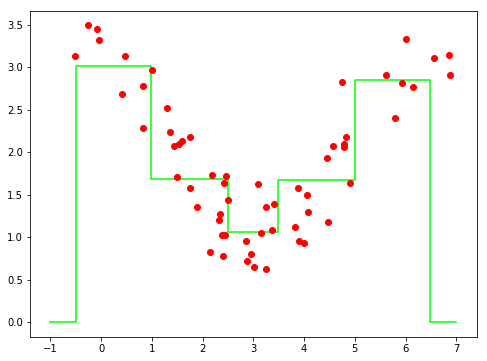

In [56]:
xn = np.linspace(-1, 7, 500)
Xn_cons = piecewise_constant_basis(xn, fixed_pts)
yn_pred = Xn_cons @ Beta
plt.figure(figsize=(8, 6))
plt.step(xn, yn_pred, "lime")
plt.plot(x, y, "ro")
plt.show()

### With Piecewise Linear Basises

In [61]:
def piecewise_linear_basis(x, fixed_pts):
    X_lin = []
    for i in range(1, len(fixed_pts)-1):
        basis = np.zeros(len(x))
        cond1 = (x > fixed_pts[i-1]) & (x < fixed_pts[i])
        b1 = (x[cond1] - fixed_pts[i-1]) / (fixed_pts[i] - fixed_pts[i-1])
        basis[np.argwhere(cond1 == True)] = b1.reshape(-1, 1)
        cond2 = (x > fixed_pts[i]) & (x < fixed_pts[i+1])
        b2 = (x[cond2] - fixed_pts[i]) / (fixed_pts[i+1] - fixed_pts[i])
        basis[np.argwhere(cond2 == True)] = b2.reshape(-1, 1)
        X_lin.append(basis)  
        
    return np.array(X_lin).T

In [62]:
X_lin = piecewise_linear_basis(x, fixed_pts)
Beta = np.linalg.inv(X_lin.T @ X_lin) @ X_lin.T @ y
y_pred = X_lin @ Beta
error = np.sum((y - y_pred)**2) / len(y)
error

1.0492810890467212

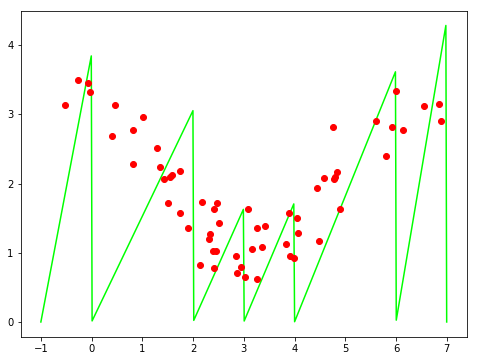

In [63]:
xn = np.linspace(-1, 7, 500)
Xn_lin = piecewise_linear_basis(xn, fixed_pts)
yn_pred = Xn_lin @ Beta
plt.figure(figsize=(8, 6))
plt.plot(xn, yn_pred, "lime")
plt.plot(x, y, "ro")
plt.show()

In [48]:
fixed_pts

[-1, 0, 2, 3, 4, 6, 7]